In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.optimize import fmin_tnc
from sklearn.datasets import load_iris

In [21]:
#iris = load_iris()
#iris_data = iris.data
iris_load = load_iris()
iris_data = iris_load.data

In [16]:
# if you already have your dataset
iris=pd.read_csv("../data/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
dataset = pd.DataFrame(iris_load, columns = iris_load.feature_names)
dataset['target'] = iris_load.target
dataset['target_names'] = dataset['target'].apply(lambda x: iris_load.target_names[x])
dataset['sepal length (cm)'] = iris_data[:,0]
dataset['sepal width (cm)'] = iris_data[:,1]
dataset['petal length (cm)'] = iris_data[:,2]
dataset['petal width (cm)'] = iris_data[:,3]

# remove index column
#dataset = dataset.drop('Unnamed: 0', axis=1)

In [33]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


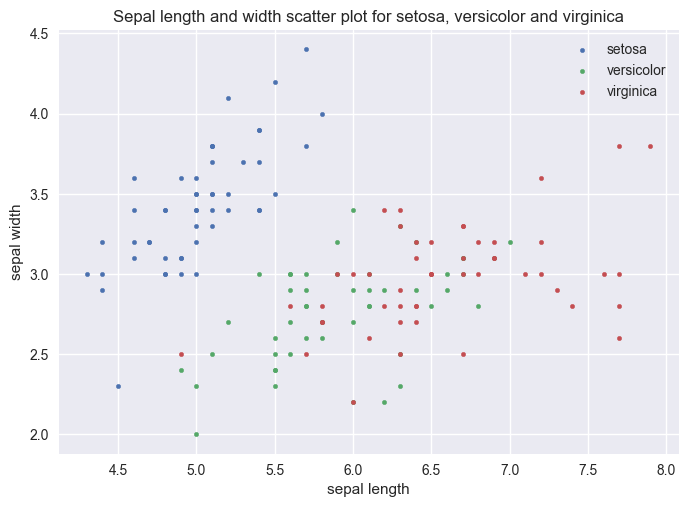

In [49]:
#Sepal length and width scatter plot for setosa and versicolor
if __name__ == "__main__":
    data = dataset[:]
    X = data.iloc[:, :-2]
    y = data.iloc[:, -2]

    setosa = data.loc[y == 0]
    versicolor = data.loc[y == 1]
    virginica = data.loc[y == 2]


    plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
    plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
    plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], s=10, label='virginica')
    plt.title('Sepal length and width scatter plot for setosa, versicolor and virginica')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()
    plt.style.use('seaborn')
    plt.show()

In [50]:
#Variables
X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.array(y)[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [51]:
# Variables Types
print('X: ', type(X), X.shape)
print('y: ', type(y), y.shape)
print('theta: ', type(theta), theta.shape)

X:  <class 'numpy.ndarray'> (150, 5)
y:  <class 'numpy.ndarray'> (150, 1)
theta:  <class 'numpy.ndarray'> (5, 1)


In [52]:
#Sigmoid function, net input, and probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [53]:
def net_input(theta, x):
    return np.dot(x, theta)

In [54]:
def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [55]:
#Cost fucntion and gradient
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

In [56]:
def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [57]:
#error
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [58]:
#fit
def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

In [59]:
parameters = fit(X, y, theta)

In [60]:
#decision boundary 
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

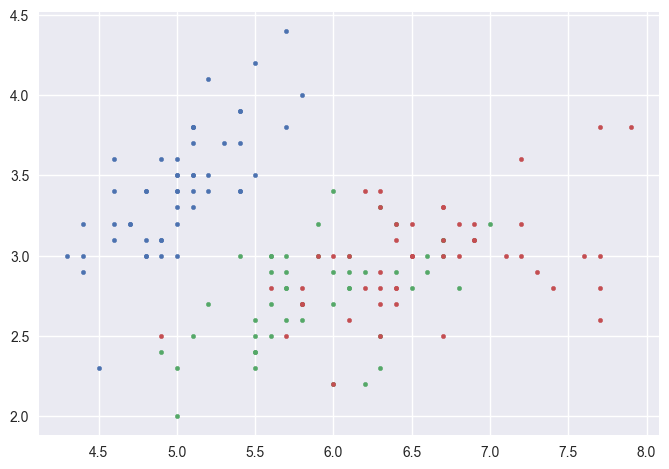

In [62]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], s=10, label='virginica')

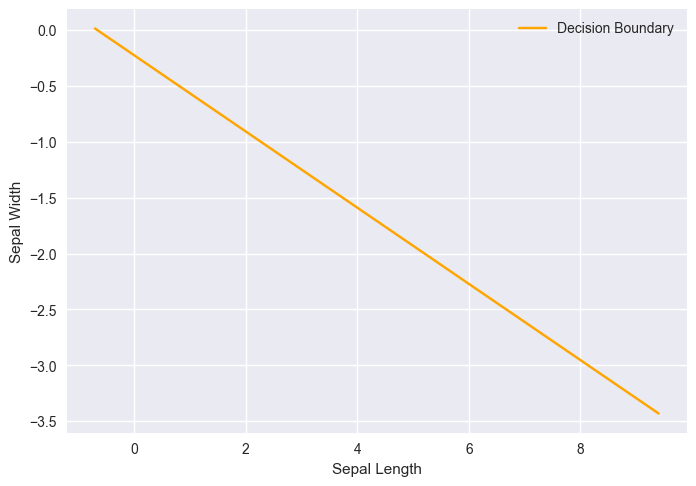

In [63]:
plt.plot(x_values, y_values, label='Decision Boundary', color='orange')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()